# Portfolio Risk Calculator - Usage Example
 
 This notebook demonstrates how to use the Portfolio Risk Calculator project to calculate Value-at-Risk (VaR) and Expected Shortfall (ES) for a sample portfolio using both Parametric and Monte Carlo methods.
 
 **Project Overview:**
 The calculator is built in Python and leverages libraries like NumPy, SciPy, and Matplotlib. It applies financial risk management concepts, referencing Thierry Roncalli's "Handbook of Financial Risk Management."
 
 **Before running this notebook:**
 1. Ensure you have followed the setup instructions in the main `README.md` of the project (cloned the repository, set up a virtual environment, and installed dependencies from `requirements.txt`).


In [2]:
# This cell ensures that the Python interpreter can find your project's source files
# when this notebook is run from the 'examples/' directory.

import sys
import os
import numpy as np # Will be used by the imported modules
import matplotlib.pyplot as plt # For displaying the plot from main.py

# Get the current working directory of the notebook (assumed to be in 'examples/')
notebook_dir = os.getcwd() 

# Construct the path to the project root directory (one level up from 'examples/')
project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir))

# Add the project root to sys.path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added project root to sys.path: {project_root}")
else:
    print(f"Project root already in sys.path: {project_root}")

# Verify that 'src' is accessible (optional check)
src_path = os.path.join(project_root, "src")
if os.path.isdir(src_path):
    print(f"Found 'src' directory: {src_path}")
else:
    print(f"Warning: 'src' directory not found at {src_path}. Imports might fail.")
    print("Please ensure this notebook is in an 'examples' folder directly under the project root,")
    print("and the 'src' folder is also directly under the project root.")

Added project root to sys.path: /workspaces/Portfolio-VaR-ES-Calculator
Found 'src' directory: /workspaces/Portfolio-VaR-ES-Calculator/src


 ## 1. Understanding Portfolio Configuration
 
 The portfolio parameters and risk settings are defined in a dictionary named `DEFAULT_PORTFOLIO` within the `src/main.py` script. Let's import it and see its structure.
 
 The key components of this configuration include:
 - `name`: A descriptive name for the portfolio.
 - `portfolio_value`: The total initial market value.
 - `asset_names`: A list of names for the assets in the portfolio.
 - `weights`: A NumPy array specifying the proportion of the portfolio's value in each asset (must sum to 1).
 - `expected_annual_returns`: A NumPy array of the anticipated annualized return for each asset.
 - `annual_volatilities`: A NumPy array of the expected annualized volatility (standard deviation) for each asset.
 - `correlation_matrix`: A NumPy array representing the correlation coefficients between asset returns.
 - `confidence_level`: The confidence level for VaR/ES calculations (e.g., 0.99 for 99%).
 - `time_horizon_days`: The period (in days) over which risk is estimated.
 - `num_simulations`: The number of paths for the Monte Carlo simulation.
 - `trading_days_per_year`: Assumed number of trading days in a year (e.g., 252), for converting annual figures to daily.


In [3]:
# We will import the DEFAULT_PORTFOLIO from main.

try:
    from src.main import DEFAULT_PORTFOLIO
    print("Successfully imported DEFAULT_PORTFOLIO from src.main")
    
    print("\n--- DEFAULT_PORTFOLIO Configuration ---")
    for key, value in DEFAULT_PORTFOLIO.items():
        if isinstance(value, np.ndarray):
            print(f"  {key}:")
            print(f"    {value}")
        else:
            print(f"  {key}: {value}")
    print("--------------------------------------")

except ImportError as e:
    print(f"Error importing from src.main: {e}")
    print("Please ensure the sys.path setup in the previous cell worked correctly and 'src/main.py' exists.")
except AttributeError:
    print("Error: DEFAULT_PORTFOLIO not found in src.main.py. Has it been defined there?")

Successfully imported DEFAULT_PORTFOLIO from src.main

--- DEFAULT_PORTFOLIO Configuration ---
  name: Default Diversified Portfolio
  portfolio_value: 1000000
  asset_names: ['Equity_US', 'Bond_EU', 'Commodity_Gold']
  weights:
    [0.5 0.3 0.2]
  expected_annual_returns:
    [0.08 0.03 0.05]
  annual_volatilities:
    [0.15 0.05 0.18]
  correlation_matrix:
    [[1.   0.2  0.1 ]
 [0.2  1.   0.05]
 [0.1  0.05 1.  ]]
  confidence_level: 0.99
  time_horizon_days: 10
  num_simulations: 10000
  trading_days_per_year: 252
--------------------------------------


 ## 2. Running the Risk Calculations
 
 The `src/main.py` script contains a function `run_risk_calculations()` which orchestrates the entire process:
 1. Loads the portfolio configuration.
 2. Calculates daily financial figures (expected returns, volatilities, covariance matrix).
 3. Calls the Parametric VaR/ES calculation function.
 4. Calls the Monte Carlo VaR/ES calculation function.
 5. Displays the results for both methods.
 6. If `matplotlib` is available, it will also attempt to show a histogram of the simulated Monte Carlo returns.
 
 Let's import and run this function.

Successfully imported run_risk_calculations from src.main

Starting portfolio risk calculations...
--- Starting Risk Calculations for: DEFAULT_PORTFOLIO ---

--- Parametric (Variance-Covariance) Results ---
Portfolio: Default Diversified Portfolio
Initial Portfolio Value: $1,000,000.00
Confidence Level: 99.0%
Time Horizon: 10 days
------------------------------
VaR (99.0%) Return: -3.9598%
VaR (99.0%) Value: $39,597.56
ES (99.0%) Return: -4.5707%
ES (99.0%) Value: $45,706.56
------------------------------

Starting Monte Carlo simulation with 10000 paths...
(This may take a moment depending on the number of simulations and horizon)

--- Monte Carlo Simulation Results ---
Portfolio: Default Diversified Portfolio
Initial Portfolio Value: $1,000,000.00
Confidence Level: 99.0%
Time Horizon: 10 days
------------------------------
VaR (99.0%) Return: -3.8826%
VaR (99.0%) Value: $38,826.08
ES (99.0%) Return: -4.4177%
ES (99.0%) Value: $44,177.16
------------------------------

Plot generated 

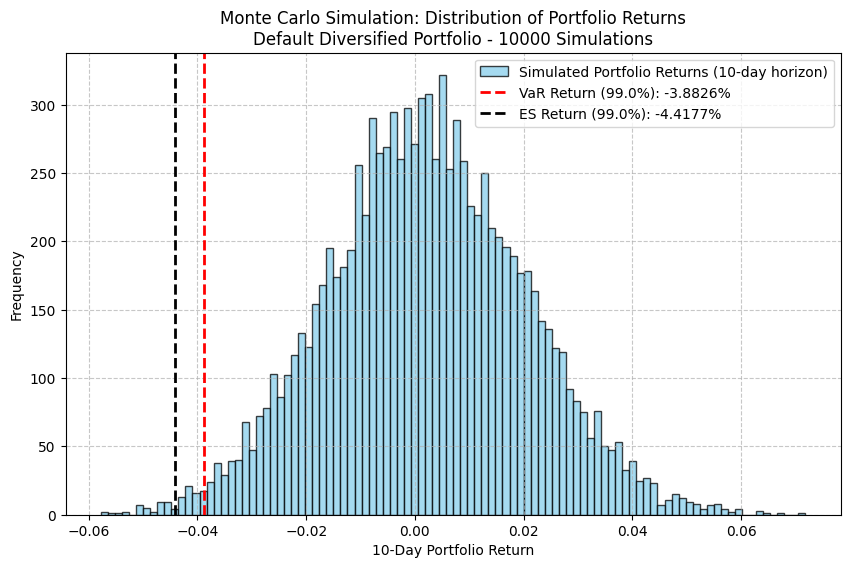

In [4]:
# Run the Risk Calculations

try:
    from src.main import run_risk_calculations
    print("Successfully imported run_risk_calculations from src.main")
    
    print("\nStarting portfolio risk calculations...")
    print("="*50)
    
    # Run the calculations using the default portfolio configuration
    # The function will print results to the console and may show a plot.
    run_risk_calculations(portfolio_config_name="DEFAULT_PORTFOLIO")
    
    print("="*50)
    print("Risk calculations finished.")
    
    # Ensure matplotlib plots are shown inline in the notebook if plt.show() is used
    # %matplotlib inline # This is a Jupyter magic command, usually placed at the top
                        # or before the first plot. The plot in main.py might show
                        # automatically or might need plt.show() to be uncommented there.
                        # If main.py's plt.show() is commented out, the plot won't appear here
                        # unless you modify main.py or replicate plotting logic here.
    
except ImportError as e:
    print(f"Error importing run_risk_calculations from src.main: {e}")
    print("Please ensure the sys.path setup in the first code cell worked correctly.")
except Exception as e_run:
    print(f"An error occurred during run_risk_calculations: {e_run}")

 ## 3. Interpreting the Output
 
 After running the cell above, you should see output in the console similar to this (Monte Carlo numbers will vary slightly):
 
 ```
 --- Starting Risk Calculations for: DEFAULT_PORTFOLIO ---
 
 --- Parametric (Variance-Covariance) Results ---
 Portfolio: Default Diversified Portfolio
 Initial Portfolio Value: $1,000,000.00
 Confidence Level: 99.0%
 Time Horizon: 10 days
 ------------------------------
 VaR (99.0%) Return: -X.XXXX%
 VaR (99.0%) Value: $XX,XXX.XX
 ES (99.0%) Return: -Y.YYYY%
 ES (99.0%) Value: $YY,YYY.YY
 ------------------------------
 
 Starting Monte Carlo simulation with 10000 paths...
 (This may take a moment depending on the number of simulations and horizon)
 
 --- Monte Carlo Simulation Results ---
 Portfolio: Default Diversified Portfolio
 Initial Portfolio Value: $1,000,000.00
 Confidence Level: 99.0%
 Time Horizon: 10 days
 ------------------------------
 VaR (99.0%) Return: -A.AAAA%
 VaR (99.0%) Value: $AA,AAA.AA
 ES (99.0%) Return: -B.BBBB%
 ES (99.0%) Value: $BB,BBB.BB
 ------------------------------
 Plot generated (plt.show() is commented out for non-interactive environments).
 
 --- Risk Calculations Finished ---
 ```
 
 **Key Metrics:**
 - **VaR (Value-at-Risk) Return:** The worst expected loss (as a negative percentage) that the portfolio is not expected to exceed over the specified time horizon, at the given confidence level.
 - **VaR Value:** The monetary equivalent of the VaR Return. For example, a VaR Value of \$68,000 means there's a 1% chance (for 99% confidence) of losing more than \$68,000.
 - **ES (Expected Shortfall) Return:** The expected loss (as a negative percentage) *given that* the loss exceeds the VaR threshold.
 - **ES Value:** The monetary equivalent of the ES Return. This value will typically be larger (a worse loss) than the VaR Value.
 
 **Monte Carlo Plot:**
 If the plot is displayed (or saved by `main.py`), it will show a histogram of the simulated portfolio returns from the Monte Carlo method. Vertical lines on this histogram will indicate the calculated VaR and ES returns, providing a visual representation of where these risk measures fall within the distribution of potential outcomes.


 ## 4. Modifying Portfolio Parameters
 
 To calculate VaR and ES for a different portfolio or with different risk parameters:
 
 1.  **Edit `src/main.py`:** The simplest way with the current project structure is to directly modify the `DEFAULT_PORTFOLIO` dictionary within the `src/main.py` file. You can change asset weights, expected returns, volatilities, the correlation matrix, confidence level, time horizon, etc. After saving your changes to `src/main.py`, re-run Cell 3 in this notebook.
 
 2.  **(Advanced) Modify `run_risk_calculations` (Not implemented in current project):**
     A more flexible approach for programmatic use would be to modify the `run_risk_calculations` function in `src/main.py` to accept a portfolio configuration dictionary as an argument. This would allow you to define multiple portfolio configurations in this notebook (or load them from elsewhere) and pass them to the function without altering `src/main.py` each time.
     *Example (conceptual, requires changes to `src/main.py`):*
     ```python
     # --- In this notebook ---
     # my_custom_portfolio = { ... define your portfolio ... }
     # run_risk_calculations(custom_portfolio_config=my_custom_portfolio)
     ```
 
 For now, please use method 1 if you want to experiment with different parameters.


 This notebook has demonstrated the basic usage of the Portfolio Risk Calculator. By running the `run_risk_calculations` function, you can obtain VaR and ES estimates for the configured portfolio using both Parametric and Monte Carlo methods.
 
 For further details on the methodologies, assumptions, and underlying code, please refer to the project's main `README.md` file and the source code documentation.
